In [110]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
# Saved directly because of lack of access to cluster
# MSE! Change to MAE later

ols_lin_mix_id = [0.08964062675873301, 0.08806657308648198, 0.08901890278327039, 0.08743684451074057, 0.08777189521068961]
ols_lin_mix_ood_1 = [0.08711460757272761, 0.08707617565195001, 0.08697293410546349, 0.08698486553041969, 0.08697607349285436]
ols_lin_mix_ood_2 = [0.08649301774069454, 0.08646344902139087, 0.08647454085579942, 0.08649552206588193, 0.08657278341650369]

ols_id = [0.08964062675873319, 0.08743684451074228, 0.0897530958471455, 0.08831557553724848, 0.08542466154813684]
ols_ood_1 = [0.08711460757272083, 0.0869848655304204, 0.08700214207879656, 0.08699887420390176, 0.08699859080295831]
ols_ood_2 = [0.08650211669989336, 0.08649552206587917, 0.08649301774069364, 0.08646344902139129, 0.08652136337672908]

mean_id = [0.9853824456107292, 1.0211085615382938, 1.0042134449312214, 0.9983910971811665, 0.9964565852334024]
mean_ood_1 = [1.0390721709057973, 1.0390520980804214, 1.0390178207257035, 1.039036431096173, 1.03905956218334]
mean_ood_2 = [1.0114038912394139, 1.0113436166477672, 1.0111411679430218, 1.0113941499509131, 1.0114202933915097]

mlp_id = [0.11373, 0.10395, 0.092718, 0.092751, 0.1001]
mlp_ood_1 = [5.10199, 3.7035, 5.25533, 5.61362, 7.07309]
mlp_ood_2 = [1.38429, 1.87722, 1.04504, 1.74418, 1.87644]

pcl_id = [0.21091, 0.20644, 0.2002, 0.16556, 0.18632]
pcl_ood_1 = [35.34298, 38.8908, 34.01423, 27.05158, 23.5077]
pcl_ood_2 = [0.19783, 0.19262, 0.26187, 0.2804, 0.19163]

In [5]:
df = sns.load_dataset("titanic")

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [56]:
env_id = ['i.d.'] * 5 + ['o.o.d. env . 1'] * 5 + ['o.o.d. env. 2'] * 5
model_ols = ['OLS'] * 15
model_mean = ['Mean y_train'] * 15
model_mlp = ['MLP'] * 15
model_pcl = ['PCL'] * 15

In [57]:
plot_df = pd.DataFrame({'MSE': ols_id + ols_ood_2 + ols_ood_1 + mean_id + mean_ood_2 + mean_ood_1 + mlp_id + mlp_ood_2 + mlp_ood_1 + pcl_id + pcl_ood_2 +pcl_ood_1,
                       'Environment': env_id + env_id + env_id + env_id,
                       'Model': model_ols +model_mean + model_mlp + model_pcl})

/var/folders/3t/tsy826vs2hqbz3y19mzxzp1w0000gn/T/ipykernel_28649/1656946704.py:3: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.violinplot(data=plot_df, x='Environment', y='MSE', hue='Model', log_scale=(False, True),


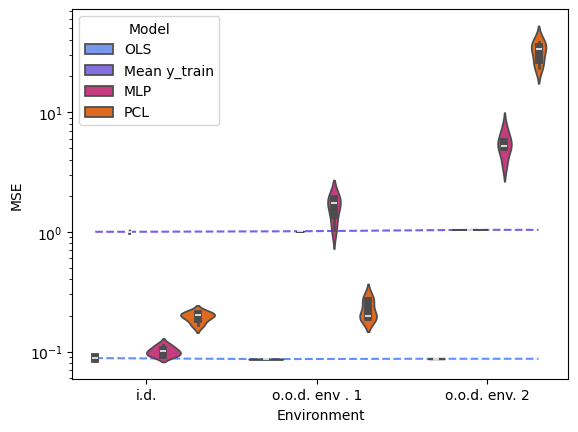

In [115]:
fig= plt.figure()

ax = sns.violinplot(data=plot_df, x='Environment', y='MSE', hue='Model', log_scale=(False, True),
                 palette=["#648fff", "#785ef0", "#dc267f", "#fe6100", "#ffb000", "#000000", "#ffffff"])
ax.plot([-0.3, 0.7, 1.7, 2.3], [np.mean(ols_id), np.mean(ols_ood_2), np.mean(ols_ood_1), np.mean(ols_ood_1)],
        '--', color="#648fff", zorder=0)
ax.plot([-0.3, -0.1, 0.9, 1.9, 2.3], [np.mean(mean_id), np.mean(mean_id), np.mean(mean_ood_2), np.mean(mean_ood_1), np.mean(mean_ood_1)],
        '--', color="#785ef0", zorder=0)
# ax.vlines(x=5, ymin=0, ymax=10, colors='red')


In [116]:
save_directory = '/Users/Simon/Documents/PhD/Projects/CausalRepresentationChambers/figures/local/ood'
fig_name = 'ood_violin_mse_test.pdf'
fig.savefig(os.path.join(save_directory, fig_name), bbox_inches='tight')

In [ ]:
# TODO: add baseline predictor that takes average of training labels